In [1]:
#: Imports and Loading the Saved Model

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model (this includes the preprocessor and the classifier)
model = joblib.load('../models/best_lead_scoring_model.pkl')

# Load the original cleaned data for testing/scoring
df = pd.read_csv('../data/cleaned_sales_leads_dataset.csv')
lead_ids = df['lead_id'] # Keep IDs for the final report
X = df.drop(columns=['lead_id', 'converted'])

In [2]:
#Generating Lead Scores
# Get probabilities for the "Converted" class (index 1)
# Note: This works for Logistic Regression and most classifiers
probabilities = model.predict_proba(X)[:, 1]

# Convert probability to a 0-100 score
df['lead_score'] = (probabilities * 100).round(2)

print("Lead Scores generated successfully.")

Lead Scores generated successfully.


In [3]:
# Creating the Lead Prioritization Matrix
# Define threshold rules [cite: 106]
def prioritize(score):
    if score >= 70:
        return 'High'
    elif score >= 40:
        return 'Medium'
    else:
        return 'Low'

# Apply the categorization
df['priority_level'] = df['lead_score'].apply(prioritize)

# Display the top 10 most promising leads
print("--- Lead Prioritization Matrix Preview ---")
print(df[['lead_id', 'lead_score', 'priority_level']].sort_values(by='lead_score', ascending=False).head(10))

--- Lead Prioritization Matrix Preview ---
       lead_id  lead_score priority_level
432  LEAD_0433       100.0           High
510  LEAD_0511       100.0           High
85   LEAD_0086       100.0           High
90   LEAD_0091       100.0           High
910  LEAD_0911       100.0           High
906  LEAD_0907       100.0           High
932  LEAD_0933       100.0           High
491  LEAD_0492       100.0           High
883  LEAD_0884       100.0           High
60   LEAD_0061       100.0           High


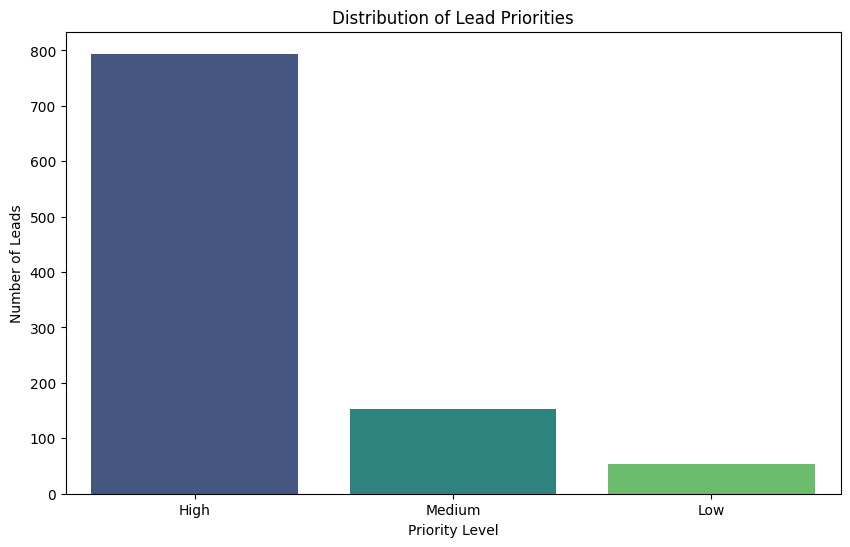

Summary:
priority_level
High      794
Medium    152
Low        54
Name: count, dtype: int64


In [5]:
#Visualizing the Sales Funnel
# Count leads in each priority level
priority_counts = df['priority_level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(
    x=priority_counts.index, 
    y=priority_counts.values, 
    hue=priority_counts.index, 
    palette='viridis', 
    legend=False
)
plt.title('Distribution of Lead Priorities')
plt.xlabel('Priority Level')
plt.ylabel('Number of Leads')
plt.show()

print(f"Summary:\n{priority_counts}")

In [6]:
#Generating Automated Lead Quality Reports
# Create a clean report for the Sales Team
sales_report = df[['lead_id', 'industry', 'location', 'lead_score', 'priority_level']]

# Save to CSV [cite: 107]
sales_report.to_csv('daily_lead_prioritization_report.csv', index=False)

print("Automated Lead Quality Report saved to:daily_lead_prioritization_report.csv")

Automated Lead Quality Report saved to:daily_lead_prioritization_report.csv
